# Data Analysis

## Set Up

In [1]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from scipy import stats

In [2]:
analysis_df = pd.read_csv('../data/aita_data.csv')

To prevent clutter and to maintain a clean version of the DataFrame in case I need to revert, I will be saving any analysis and edits to the original DataFrame to a copy of the corpus. If something might be useful in the future, I will add that column to analysis_df. But, if it's likely bound to the analysis only in one section, I will make another DataFrame for that aside.

Checking to see if it populated properly:

In [3]:
analysis_df.head()

,Unnamed: 0,AuthorID,Title,Text,Ruling,CommentCount,Score,UpvoteRatio
0,0,1,AITA for sleeping during the day?,"I honestly thought what I was doing was fine, ...",Not the A-hole,34,7,0.82
1,2,0,AITAH for refusing to change out of my semi-se...,My boyfriend was FaceTiming his cousin and his...,Not the A-hole,23,8,0.78
2,6,2,AITA for not helping my neighbor?,I (M26) live in a large apartment complex with...,Not the A-hole,253,1016,0.97
3,9,3,AITA for threatening to lock my housemate's wi...,I'll keep it short; my housemate moved in arou...,Everyone Sucks,34,4,0.76
4,25,4,AITA for allowing my bio dad and his wife to b...,I found out that I am pregnant about 5 1/2 mon...,Not the A-hole,62,46,0.88


In [4]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9414 entries, 0 to 9413
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9414 non-null   int64  
 1   AuthorID      9414 non-null   int64  
 2   Title         9414 non-null   object 
 3   Text          9414 non-null   object 
 4   Ruling        9414 non-null   object 
 5   CommentCount  9414 non-null   int64  
 6   Score         9414 non-null   int64  
 7   UpvoteRatio   9414 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 588.5+ KB


Let's look at the breakdown of rulings:

In [5]:
analysis_df.Ruling.value_counts()

Not the A-hole     7180
Asshole            1399
No A-holes here     471
Everyone Sucks      364
Name: Ruling, dtype: int64

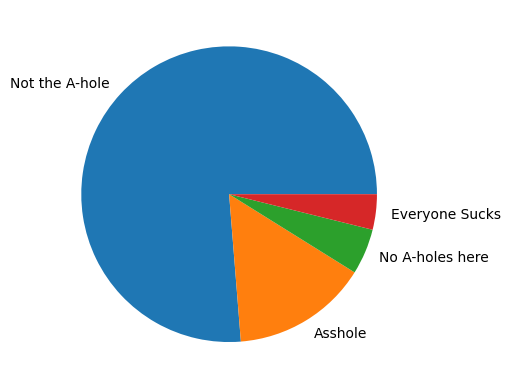

In [6]:
rulings_graph = plt.pie(analysis_df.Ruling.value_counts(), labels=["Not the A-hole", "Asshole", "No A-holes here", "Everyone Sucks"])
plt.show()

A vast majority of rulings believe that the poster is not the asshole. There's significantly less data for all the other rulings, but especially No Assholes here and Everyone Sucks Here. This makes sense, as the premise of the subreddit emphasizes the binary of were you good or bad in a situation, so the two more nuanced rulings have less usage.

## Question: How much context and justification do the posters give?

### Practically: How does post length vary between rulings?

Based on the subreddit's [Rules](https://www.reddit.com/r/AmItheAsshole/about/rules/), posts are limited to 3000 characters. However, not every story needs to take up that entire length to be told. Is there any meaningful variance between the overall post lengths of the four rulings? I could imagine that people trying to shake the blame off themselves would spend more time trying to justify their actions.

In [7]:
analysis_df["Tokens"] = analysis_df.Text.map(nltk.word_tokenize)
analysis_df["TokenCount"] = analysis_df.Tokens.map(lambda x: len(x))
analysis_df["Sentences"] = analysis_df.Text.map(nltk.sent_tokenize)

In [8]:
tokencount_compare = analysis_df.groupby("Ruling")["TokenCount"].mean()
tokencount_compare = tokencount_compare.to_frame()
print(tokencount_compare)

                 TokenCount
Ruling                     
Asshole          421.760543
Everyone Sucks   478.607143
No A-holes here  383.898089
Not the A-hole   445.821866


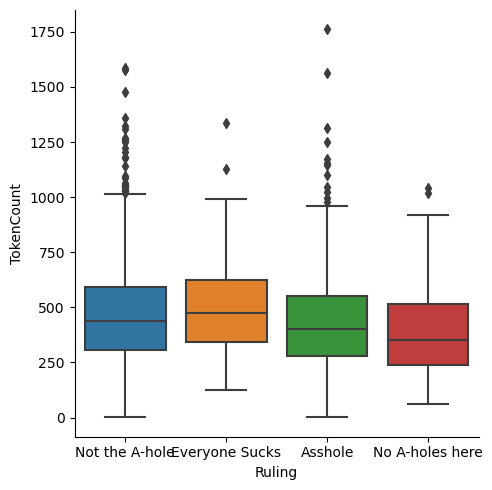

In [9]:
sns.catplot(x="Ruling", y="TokenCount", data=analysis_df, kind="box")
plt.show()

This data shows that writers declared as Not the Asshole actually write the most on average. Perhaps this could imply that, instead of being perceived as trying to over-justify their actions, writing more simply provides a higher amount of context that allows readers to actually understand their position. Conversely, perhaps the low token count on No Assholes Here shows that there's not enough of a story being told to justify a ruling. Or, that a situation in itself is so small that you shouldn't even have to worry about it.

Writers declared as Assholes seem to have the widest variance in how long each post is. This might suggest what I came into this test hypothesizing: that readers would be able to detect someone who is trying to overcompensate for their actions. This might also be attributed to a variety of other causes, though. Maybe some situations just need much more context to explain thoroughly.

In [10]:
yta = analysis_df[(analysis_df.Ruling == "Asshole")].TokenCount
nta = analysis_df[(analysis_df.Ruling == "Not the A-hole")].TokenCount
nah = analysis_df[(analysis_df.Ruling == "No A-holes here")].TokenCount
esh = analysis_df[(analysis_df.Ruling == "Everyone Sucks")].TokenCount

stats.f_oneway(yta, nta, nah, esh)

F_onewayResult(statistic=28.19592519133767, pvalue=3.826423806329736e-18)

The one-way ANOVA shows there is some meaningful distinction between the groups.

I'll also consider the length of the post title, as that's the first first impression people will have on the subject.

In [11]:
analysis_df["TitleTokens"] = analysis_df.Title.map(nltk.word_tokenize)
analysis_df["TitleTkCount"] = analysis_df.TitleTokens.map(lambda x: len(x))

In [12]:
tokencount_compare = analysis_df.groupby("Ruling")["TitleTkCount"].mean()
tokencount_compare = tokencount_compare.to_frame()
print(tokencount_compare)

                 TitleTkCount
Ruling                       
Asshole             13.383846
Everyone Sucks      12.618132
No A-holes here     12.600849
Not the A-hole      12.881894


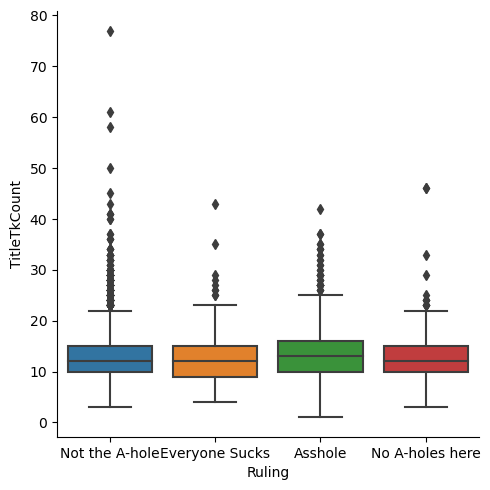

In [13]:
sns.catplot(x="Ruling", y="TitleTkCount", data=analysis_df, kind="box")
plt.show()

It makes sense that the differences between them are so minimal, since there's a strict limit of 300 characters on any Reddit post title. Visually, is also seems that there's so much variance in how many words are used that it's not very meaningful to analyze.

In [14]:
yta = analysis_df[analysis_df.Ruling == "Asshole"].TitleTkCount
nta = analysis_df[analysis_df.Ruling == "Not the A-hole"].TitleTkCount
nah = analysis_df[analysis_df.Ruling == "No A-holes here"].TitleTkCount
esh = analysis_df[analysis_df.Ruling == "Everyone Sucks"].TitleTkCount

stats.f_oneway(yta, nta, nah, esh)

F_onewayResult(statistic=5.399421283656125, pvalue=0.0010390264201330663)

The one-way ANOVA here shows that not only is there not much meaningful distinction between the groups, and also there's a lot of in-group variance (as seen in the box plot).

## Question: Who do their stories focalize?

### Practically: Do the most common subjects of sentences vary between rulings?

Now I'm going to analyze what the common sentence subjects are within each post. Out of context, I anticipate that this may not provide the deepest look into the writing practices of each user, but I'm hoping this will set me up for some deeper analysis in later sections. This also seems like a reasonable task to start using [spaCy](https://spacy.io/) for the first time. SpaCy allows me to break each sentence down into tokens, and retrieve information like each token's part of speech and its dependencies. This allows me to isolate the noun head of each subject.

In [16]:
nlp = spacy.load('en_core_web_sm')

In [20]:
analysis_df["SpacyText"] = analysis_df["Text"].apply(lambda x: nlp(x.lower()))

Before I do anything else I'm going to save so I don't have to run the Spacy pipeline on the data ever again. This took so long to process...

There's some complications trying to save this all as one pickled DataFrame, so I'm just going to pull out the Docs generated by spaCy and rejoin them with the DataFrame whenever I need it.

In [21]:
import pickle

with open("../data/aita_internal_spacytext.pkl", "wb") as f:
    pickle.dump(analysis_df["SpacyText"], f)

Quick check to see if that worked:

In [25]:
print(pkl_test.iloc[0])

i honestly thought what i was doing was fine, but my dad’s been complaining about it a lot lately so i wanted to get some advice. i’m in my 20s, i work from home as a contracted freelancer, and while i have due dates for my work, i tend to do all of it later in the day or at night because the editors i work with don’t show up till like 3 or 4 pm, and they stick around well into the night. i do my chores and housework either very early in the morning before bed, late in the evening, or quietly at night. 
my dad’s been complaining and calling me lazy for spending all day in bed, though. i’m pretty active at night with my work and hobbies though, and unless i’m super busy i still make time for family, so i didn’t see it as an issue till i heard him yelling about it downstairs a little while ago. is it bad that i keep a sort of nocturnal schedule?


In [27]:
with open("../data/aita_internal_spacytext.pkl", "rb") as f:
    pkl_test = pickle.load(f)

for sent in pkl_test.iloc[0].sents:
    for tok in sent:
        print(tok.dep_, end=', ')

del pkl_test

nsubj, advmod, ROOT, dobj, nsubj, aux, csubj, ccomp, acomp, punct, cc, poss, nsubj, aux, aux, conj, prep, pobj, det, npadvmod, advmod, mark, nsubj, advcl, aux, xcomp, det, dobj, punct, nsubj, ccomp, prep, poss, pobj, punct, nsubj, ROOT, prep, pobj, prep, det, amod, pobj, punct, cc, mark, nsubj, advcl, amod, dobj, prep, poss, pobj, punct, nsubj, conj, aux, xcomp, dobj, prep, pobj, advmod, prep, det, pobj, cc, conj, pobj, mark, det, nsubj, nsubj, relcl, prep, aux, neg, advcl, prt, prep, pcomp, nummod, cc, conj, pobj, punct, cc, nsubj, conj, advmod, advmod, prep, det, pobj, punct, nsubj, ROOT, poss, dobj, cc, conj, preconj, advmod, advmod, prep, det, pobj, prep, pobj, punct, advmod, prep, det, pobj, punct, cc, advmod, conj, pobj, punct, dep, poss, nsubj, aux, aux, ROOT, cc, conj, dobj, oprd, prep, pcomp, det, npadvmod, prep, pobj, punct, advmod, punct, nsubj, ccomp, advmod, acomp, prep, pobj, prep, poss, pobj, cc, conj, advmod, punct, cc, mark, nsubj, advcl, advmod, acomp, nsubj, advmod, 

Looks good!

Moving on to the actual subjects. I will collect all subjects, which spaCy tags with one of two labels. "nsubj" is for active nominal subjects and "nsubjpass" is for passive nominal subjects.

In [33]:
# For every sentence, go through each token and find if it is a nominal subject. If it's a nominal subject, save it.
analysis_df["Subjects"] = analysis_df["SpacyText"].apply(lambda x: [[tok for tok in sent if (tok.dep_ == "nsubj" or tok.dep_ == "nsubjpass")] for sent in x.sents])
analysis_df["Subjects"] = analysis_df.Subjects.map(lambda x: sum(x, [])) # This is an array of arrays, I want to unpack into just 1 array

analysis_df.head(10)

,Unnamed: 0,AuthorID,Title,Text,Ruling,CommentCount,Score,UpvoteRatio,Tokens,TokenCount,Sentences,TitleTokens,TitleTkCount,SpacyText,Subjects
0,0,1,AITA for sleeping during the day?,"I honestly thought what I was doing was fine, ...",Not the A-hole,34,7,0.82,"[I, honestly, thought, what, I, was, doing, wa...",204,"[I honestly thought what I was doing was fine,...","[AITA, for, sleeping, during, the, day, ?]",7,"(i, honestly, thought, what, i, was, doing, wa...","[i, i, dad, i, i, i, i, i, editors, i, they, i..."
1,2,0,AITAH for refusing to change out of my semi-se...,My boyfriend was FaceTiming his cousin and his...,Not the A-hole,23,8,0.78,"[My, boyfriend, was, FaceTiming, his, cousin, ...",339,[My boyfriend was FaceTiming his cousin and hi...,"[AITAH, for, refusing, to, change, out, of, my...",13,"(my, boyfriend, was, facetiming, his, cousin, ...","[boyfriend, they, i, i, i, it, i, i, he, you, ..."
2,6,2,AITA for not helping my neighbor?,I (M26) live in a large apartment complex with...,Not the A-hole,253,1016,0.97,"[I, (, M26, ), live, in, a, large, apartment, ...",570,[I (M26) live in a large apartment complex wit...,"[AITA, for, not, helping, my, neighbor, ?]",7,"(i, (, m26, ), live, in, a, large, apartment, ...","[i, i, which, it, i, i, units, that, i, guy, d..."
3,9,3,AITA for threatening to lock my housemate's wi...,I'll keep it short; my housemate moved in arou...,Everyone Sucks,34,4,0.76,"[I, 'll, keep, it, short, ;, my, housemate, mo...",390,[I'll keep it short; my housemate moved in aro...,"[AITA, for, threatening, to, lock, my, housema...",15,"(i, 'll, keep, it, short, ;, my, housemate, mo...","[i, housemate, he, that, i, he, he, i, he, tha..."
4,25,4,AITA for allowing my bio dad and his wife to b...,I found out that I am pregnant about 5 1/2 mon...,Not the A-hole,62,46,0.88,"[I, found, out, that, I, am, pregnant, about, ...",408,[I found out that I am pregnant about 5 1/2 mo...,"[AITA, for, allowing, my, bio, dad, and, his, ...",16,"(i, found, out, that, i, am, pregnant, about, ...","[i, i, i, i, mom, she, she, i, who, some, i, i..."
5,29,5,WIBTA for confronting my dad about skipping Ch...,My (31F) parents (55F) and (63M) have been sep...,Not the A-hole,20,3,0.81,"[My, (, 31F, ), parents, (, 55F, ), and, (, 63...",583,[My (31F) parents (55F) and (63M) have been se...,"[WIBTA, for, confronting, my, dad, about, skip...",8,"(my, (, 31f, ), parents, (, 55f, ), and, (, 63...","[parents, i, they, it, i, i, i, husband, that,..."
6,39,6,WIBTA if on a day trip with friends I opt out ...,I (26F) live in the US and my friend from anot...,Not the A-hole,10,8,1.00,"[I, (, 26F, ), live, in, the, US, and, my, fri...",260,[I (26F) live in the US and my friend from ano...,"[WIBTA, if, on, a, day, trip, with, friends, I...",16,"(i, (, 26f, ), live, in, the, us, and, my, fri...","[i, we, her, she, i, it, we, she, she, activit..."
7,41,7,WIBTA for not celebrating Christmas with my bo...,**edit #1**: Nancy is hosting Christmas dinner...,Not the A-hole,12,3,0.80,"[*, *, edit, #, 1, *, *, :, Nancy, is, hosting...",336,[**edit #1**: Nancy is hosting Christmas dinne...,"[WIBTA, for, not, celebrating, Christmas, with...",16,"(*, *, edit, #, 1, *, *, :, nancy, is, hosting...","[*, nancy, it, boyfriend, christmas, it, we, h..."
8,42,8,AITA for being annoyed that my friend is visit...,I (38f) have two friends from university: Sue ...,Asshole,27,3,0.58,"[I, (, 38f, ), have, two, friends, from, unive...",604,[I (38f) have two friends from university: Sue...,"[AITA, for, being, annoyed, that, my, friend, ...",15,"(i, (, 38f, ), have, two, friends, from, unive...","[i, meg, i, we, i, i, i, baby, i, i, summer, m..."
9,46,9,AITA for getting upset when my roommate’s part...,Keeping this anon cause I’m not trying to put ...,Not the A-hole,277,2914,0.97,"[Keeping, this, anon, cause, I, ’, m, not, try...",311,[Keeping this anon cause I’m not trying to put...,"[AITA, for, getting, upset, when, my, roommate...",15,"(keeping, this, anon, cause, i, ’m, no

This function takes in a ruling and returns a dictionary of the top _n_ subjects found across that ruling. Let's see how they vary between rulings.

In [34]:
def count_subjects_per_ruling(ruling, number):
    ruling_rows = analysis_df[analysis_df["Ruling"] == ruling]
    ruling_subjects = ruling_rows["Subjects"].tolist()
    subjects_count = {}
    for arr in ruling_subjects:
        for subj in arr:
            subjects_count[str(subj)] = subjects_count.get(str(subj), 0) + 1
    
    sort_subjects = sorted(subjects_count.items(), key=lambda x:x[1], reverse=True)
    subjects_count = dict(sort_subjects)
    top_subjects = {i: subjects_count[i] for i in list(subjects_count)[:number]}
    return top_subjects

In [35]:
nta = count_subjects_per_ruling("Not the A-hole", 30)
yta = count_subjects_per_ruling("Asshole", 30)
nah = count_subjects_per_ruling("No A-holes here", 30)
esh = count_subjects_per_ruling("Everyone Sucks", 30)
print("Not the A-hole: ", nta)
print()
print("Asshole: ", yta)
print()
print("No A-holes here: ", nah)
print()
print("Everyone Sucks: ", esh)

Not the A-hole:  {'i': 136113, 'she': 40361, 'he': 32276, 'it': 22548, 'we': 21881, 'they': 15170, 'that': 7130, 'you': 5270, 'me': 5203, 'this': 4736, 'who': 3665, 'mom': 3293, 'which': 2489, 'her': 2396, 'dad': 1985, 'sister': 1874, 'parents': 1777, 'him': 1728, 'one': 1449, 'husband': 1442, 'friend': 1425, 'brother': 1378, 'what': 1344, 'mother': 1253, 'family': 1164, 'people': 1108, 'everyone': 949, 'them': 923, 'wife': 916, 'things': 744}

Asshole:  {'i': 24697, 'she': 8683, 'he': 5550, 'it': 4276, 'we': 4120, 'they': 2477, 'that': 1370, 'this': 985, 'you': 936, 'me': 922, 'who': 710, 'her': 497, 'mom': 495, 'which': 466, 'parents': 334, 'wife': 334, 'him': 333, 'friend': 329, 'one': 286, 'sister': 285, 'dad': 283, 'what': 280, 'husband': 271, 'people': 264, 'brother': 262, 'everyone': 190, 'son': 185, 'daughter': 174, 'family': 166, 'them': 158}

No A-holes here:  {'i': 8108, 'she': 2258, 'he': 1710, 'we': 1341, 'it': 1290, 'they': 754, 'that': 421, 'this': 306, 'me': 295, 'you':

_(Write analysis later - makes sense that the top subjects are just pronouns and the terms for people you'd care about slighting. It's a tiny thing but it's kinda funny that No A-holes and Everyone Sucks has "we" just so slightly higher than the other two. Also that "wife" is so much higher for Assholes than Not the A-holes? This isn't just a project on blame analysis, but I guess a project on reader biases and who we automatically take the sides for. Or the men on here just suck more. We'll see.)_

In [77]:
analysis_df.drop("SpacyText", axis=1, inplace=True)
analysis_df.drop("Subjects", axis=1, inplace=True)
analysis_df.to_csv("../data/aita_working_df.csv")

## Question: How much agency does the writer express?

### Practically: What proportion of sentences is written in passive voice? And, who are the subjects of active versus passive sentences?